In [9]:
import pandas as pd
import numpy as np
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 

from sklearn.metrics import silhouette_score

%matplotlib inline

In [10]:
df = pd.read_csv('/kaggle/input/burger-king-menu-nutrition-data/burger-king-menu.csv')

In [11]:
df.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


In [12]:
df.shape

(77, 14)

Silhouette:  0.4821947256051119


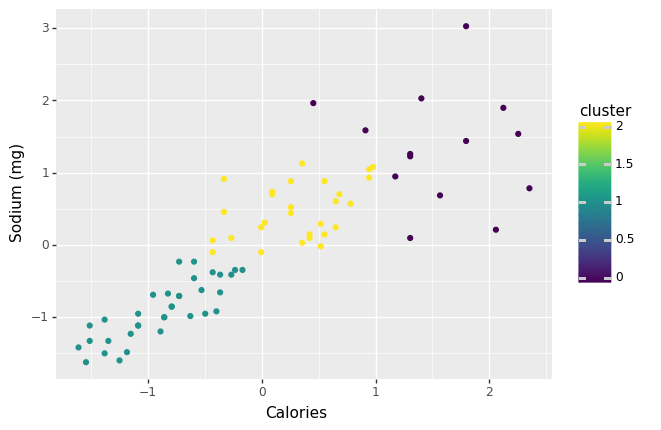

<ggplot: (8610480265580)>

In [13]:
features = ["Calories", "Sodium (mg)"]
X = df[features]
z = StandardScaler()
X[features] = z.fit_transform(X)
EM = GaussianMixture(n_components = 3) 
EM.fit(X) 
cluster = EM.predict(X)
print("Silhouette: ", silhouette_score(X, cluster))
X["cluster"] = cluster
(ggplot(X, aes(x= "Calories", y = "Sodium (mg)", color = "cluster"  )) + geom_point())

## Multiple dimensions

In [15]:
features = ["Sugars (g)", "Protein (g)", "Fat (g)"]
X = df[features]
z = StandardScaler()
X[features] = z.fit_transform(X)
EM = GaussianMixture(n_components = 3) 
EM.fit(X) 
cluster = EM.predict(X)
cluster

array([2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
print("Silhouette: ", silhouette_score(X, cluster))

Silhouette:  0.4006508103803884


In [17]:
X["cluster"] = cluster

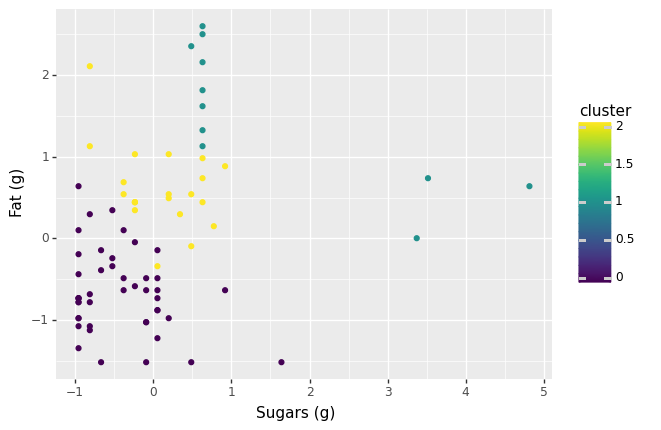

<ggplot: (8610480417693)>

In [19]:
(ggplot(X, aes(x= "Sugars (g)", y = "Fat (g)", color = "cluster"  )) + geom_point())

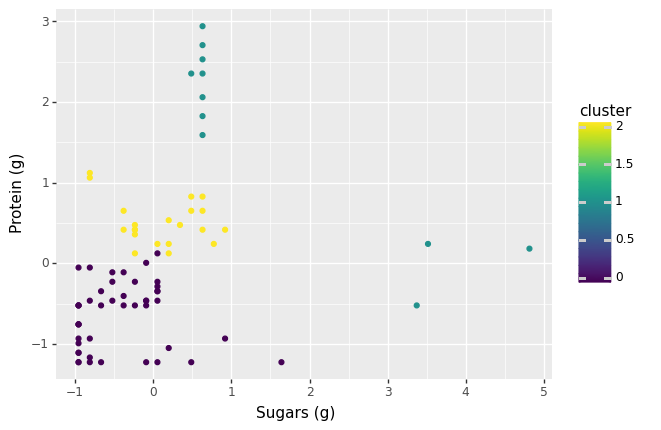

<ggplot: (8610480059807)>

In [22]:
(ggplot(X, aes(x= "Sugars (g)", y = "Protein (g)", color = "cluster"  )) + geom_point())

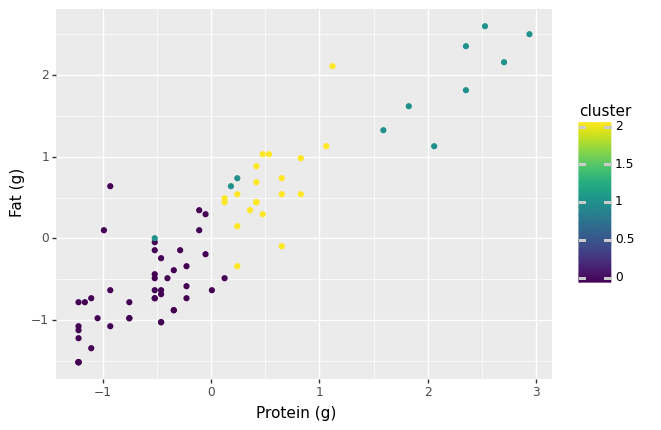

<ggplot: (8610479416209)>

In [21]:
(ggplot(X, aes(x= "Protein (g)", y = "Fat (g)", color = "cluster"  )) + geom_point())